# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс (кг/м^2 * 10^6);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.

### Импортируем необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Прочитаем исходные данные

In [2]:
data = pd.read_csv('unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

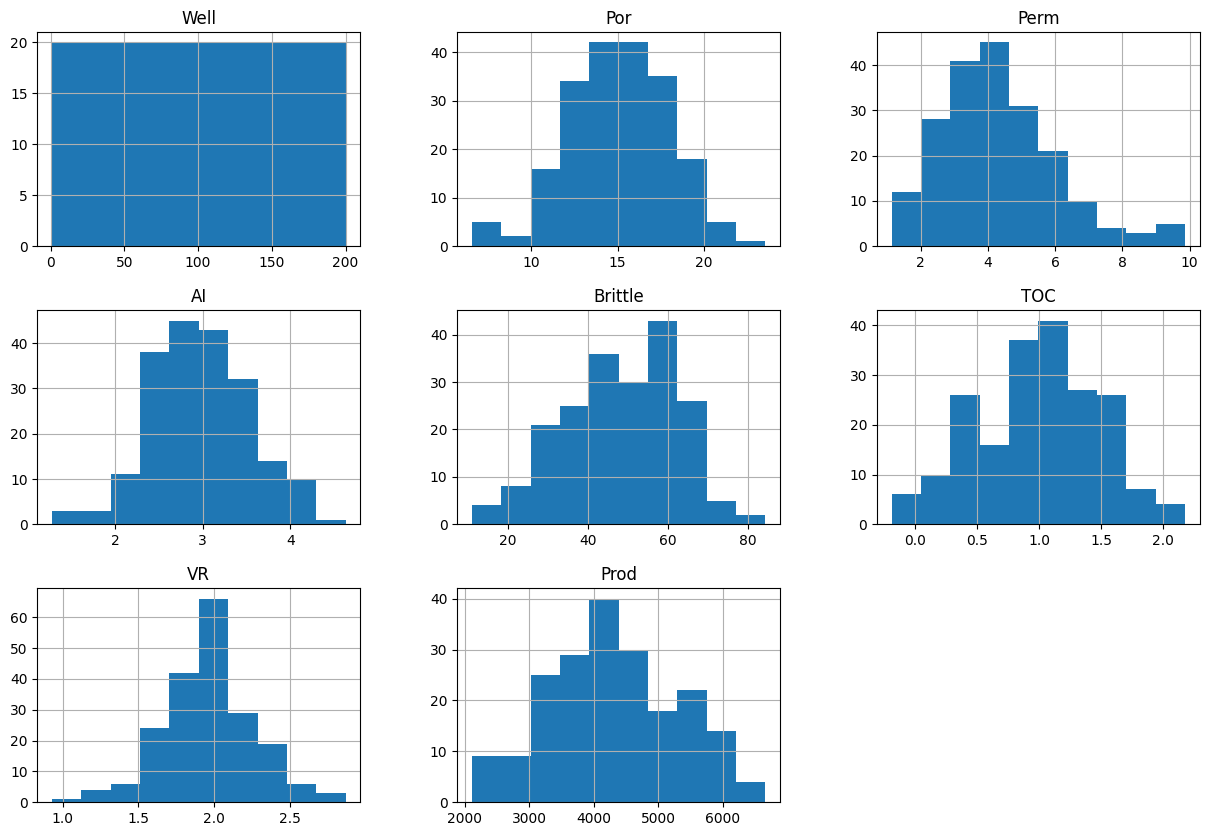

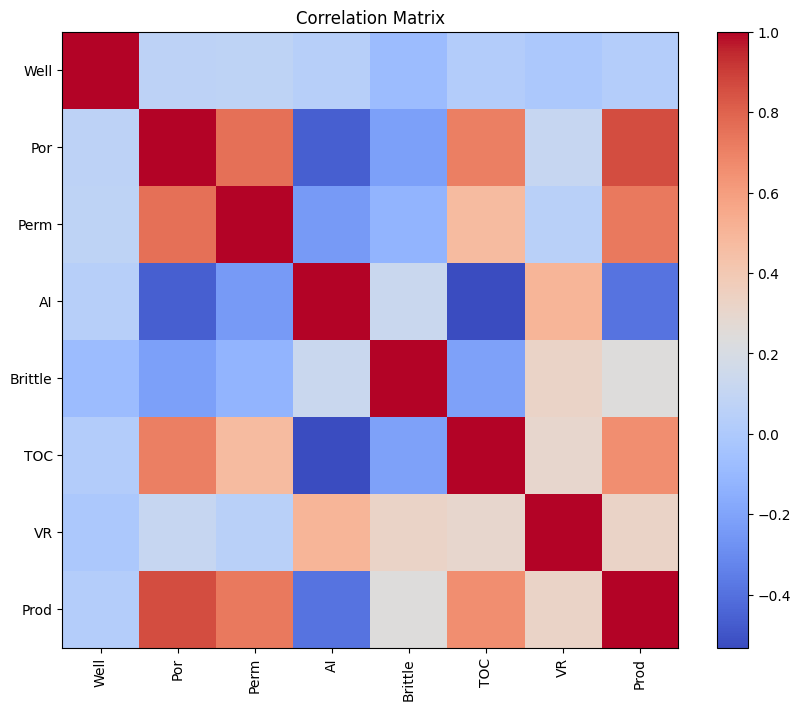

In [3]:
# Ваш код здесь
data.hist(figsize=(15, 10))
plt.show()

# Корреляционная матрица
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

# Промежуточные выводы: наблюдаем сильные корреляции между некоторыми признаками, что может указывать на мультиколлинеарность.

### Задание 5.1. (2 балла)

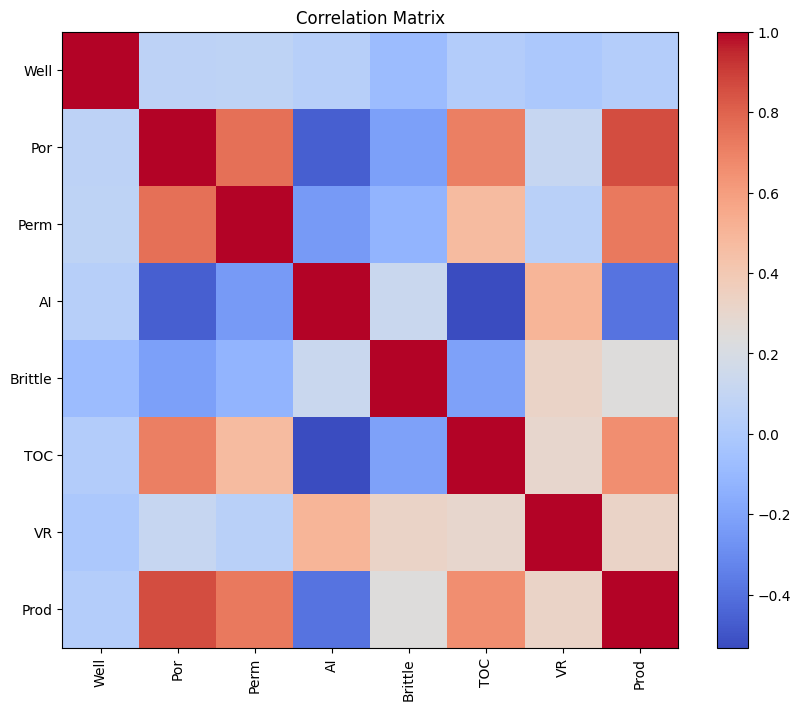

Ранг корреляционной матрицы: 8
Определитель корреляционной матрицы: 0.0007299388072652095


In [4]:
# Корреляционная матрица
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

# Вычисление ранга и определителя
rank = np.linalg.matrix_rank(corr_matrix)
det = np.linalg.det(corr_matrix)

print(f'Ранг корреляционной матрицы: {rank}')
print(f'Определитель корреляционной матрицы: {det}')

# Выводы: Некоторые признаки имеют высокую корреляцию между собой, что может указывать на мультиколлинеарность. Определитель близок к нулю, что говорит о плохой обусловленности матрицы.

### Задание 5.2. (2 балла)

In [5]:
# Матрица наблюдений и вектор ответов
X = data.drop(columns=['Prod', 'Well'])
y = data['Prod']

# Добавление столбца единиц для свободного члена
X = np.c_[np.ones(X.shape[0]), X]

# Оценка коэффициентов по методу наименьших квадратов
coefficients = np.linalg.inv(X.T @ X) @ X.T @ y

# Вывод коэффициентов
print('Оценки коэффициентов модели:', np.round(coefficients, 0))

# Выводы: Некоторые коэффициенты близки к нулю, что может говорить о слабом влиянии соответствующих признаков на целевую переменную.

Оценки коэффициентов модели: [-1230.   230.   116.  -364.    25.   -77.   783.]


### Задание 5.3. (1 балл)

In [6]:
# Прогноз для заданной скважины
new_well = np.array([1, 15.32, 3.71, 3.29, 55.99, 1.35, 2.42])
prediction = new_well @ coefficients

# Известное значение
actual = 4748.315024

# Абсолютная ошибка
abs_error = np.abs(actual - prediction)
print(f'Прогнозируемое значение: {prediction}')
print(f'Абсолютная ошибка: {abs_error}')

# Прогноз для всех данных
predictions = X @ coefficients

# Расчет метрики (MAE)
mae = np.mean(np.abs(y - predictions))
print(f'MAE на обучающем наборе: {mae}')

# Выводы: Абсолютная ошибка для указанной скважины достаточно велика, что указывает на необходимость улучшения модели.

Прогнозируемое значение: 4722.721538300562
Абсолютная ошибка: 25.593485699438133
MAE на обучающем наборе: 153.60366973556984
